# Module 10: Data Envelopment Analysis (DEA)

## Introduction

**Data Envelopment Analysis (DEA)** is a **non-parametric method** for evaluating the relative efficiency of a set of **decision-making units (DMUs)**.  
Each DMU consumes certain resources (inputs) and produces certain outcomes (outputs).

### Efficiency Concept

Efficiency of a DMU is measured as:

$$
\text{Efficiency} = \frac{\text{Weighted sum of outputs}}{\text{Weighted sum of inputs}}
$$

- A DMU is **efficient** if it lies on the efficiency frontier (score = 1).  
- A DMU is **inefficient** if it lies below the frontier (score < 1).  



---

## A Student-Oriented Example

Imagine we want to compare the efficiency of different **study groups** in a university course.  
Each group is a **DMU**.

- **Inputs** (resources consumed):
  - Hours spent studying per week  
  - Cups of coffee consumed (to stay awake!)

- **Outputs** (results achieved):
  - Average quiz score (%)  
  - Number of assignments/projects completed

### Example DMUs

| Study Group | Study Hours (Input 1) | Coffee Cups (Input 2) | Avg Quiz Score (Output 1) | Projects Completed (Output 2) |
|-------------|------------------------|------------------------|---------------------------|-------------------------------|
| A           | 10                     | 15                     | 78                        | 2                             |
| B           | 12                     | 18                     | 85                        | 3                             |
| C           | 8                      | 10                     | 80                        | 2                             |
| D           | 15                     | 20                     | 82                        | 3                             |
| E           | 9                      | 12                     | 90                        | 4                             |

- Some groups (like E) may be **very efficient**: fewer hours and coffee, but high results.  
- Others may be **inefficient**: consuming more inputs but not delivering proportionally better outputs.

We will use this **study group dataset** throughout the notebook:
1. **Introduction** — visualize inputs vs outputs.  
2. **Mathematical formulation** — apply the DEA model.  
3. **Coding** — compute efficiency scores in Python.  
4. **Extensions** — explore returns to scale and benchmarks.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define dataset
data = {
    "Study Group": ["A","B","C","D","E"],
    "Study Hours": [10, 12, 8, 15, 9],
    "Coffee Cups": [15, 18, 10, 20, 12],
    "Avg Quiz Score": [78, 85, 80, 82, 90],
    "Projects Completed": [2, 3, 2, 3, 4]
}

df = pd.DataFrame(data)
df.set_index("Study Group", inplace=True)

# Display dataset
print("Study Group DEA Dataset")
display(df)

# Basic descriptive statistics
print("\nSummary Statistics:")
display(df.describe())


Study Group DEA Dataset


,Study Hours,Coffee Cups,Avg Quiz Score,Projects Completed
Study Group,,,,
A,10,15,78,2
B,12,18,85,3
C,8,10,80,2
D,15,20,82,3
E,9,12,90,4



Summary Statistics:


,Study Hours,Coffee Cups,Avg Quiz Score,Projects Completed
count,5.000000,5.000000,5.000000,5.00000
mean,10.800000,15.000000,83.000000,2.80000
std,2.774887,4.123106,4.690416,0.83666
min,8.000000,10.000000,78.000000,2.00000
25%,9.000000,12.000000,80.000000,2.00000
50%,10.000000,15.000000,82.000000,3.00000
75%,12.000000,18.000000,85.000000,3.00000
max,15.000000,20.000000,90.000000,4.00000


## First Look at the Study Group Dataset

The dataset summarizes 5 study groups, each consuming **inputs** (study hours, coffee cups) and producing **outputs** (quiz scores, projects).

- **Study Hours** range from 8 (Group C) to 15 (Group D).  
- **Coffee Cups** range from 10 (Group C) to 20 (Group D).  
- **Average Quiz Scores** range from 78 (Group A) to 90 (Group E).  
- **Projects Completed** range from 2 (Groups A, C) to 4 (Group E).

Already, Group **E** looks strong: fewer hours and moderate coffee, but the highest quiz score and project count.  
Groups **B** and **D** consume more resources, but their results are not proportionally higher, we can think that they might be less efficient.


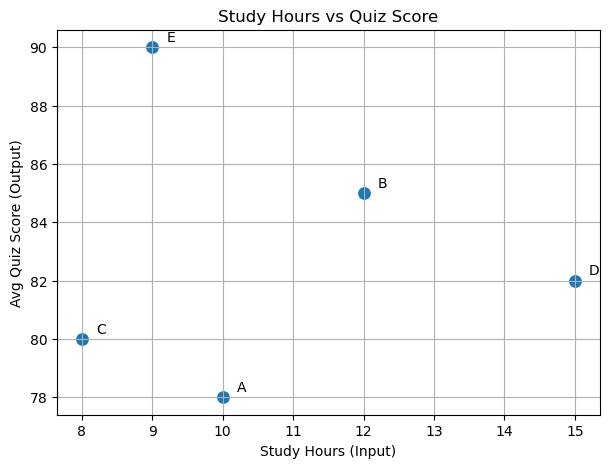

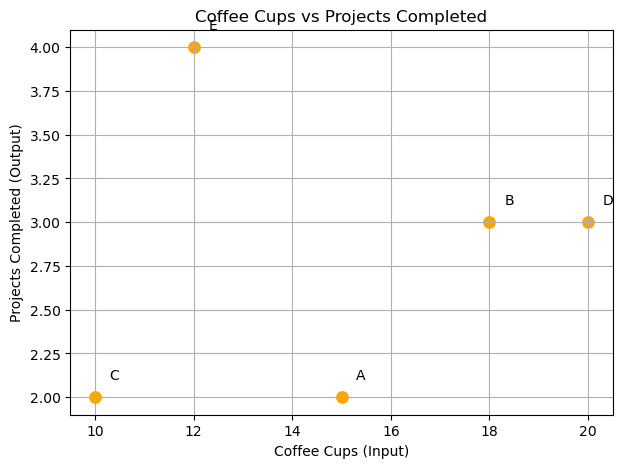

In [2]:
# Scatter plot: Study Hours vs Avg Quiz Score
plt.figure(figsize=(7,5))
sns.scatterplot(x="Study Hours", y="Avg Quiz Score", data=df, s=100)

for i, row in df.iterrows():
    plt.text(row["Study Hours"]+0.2, row["Avg Quiz Score"]+0.2, i)

plt.title("Study Hours vs Quiz Score")
plt.xlabel("Study Hours (Input)")
plt.ylabel("Avg Quiz Score (Output)")
plt.grid(True)
plt.show()

# Scatter plot: Coffee vs Projects
plt.figure(figsize=(7,5))
sns.scatterplot(x="Coffee Cups", y="Projects Completed", data=df, s=100, color="orange")

for i, row in df.iterrows():
    plt.text(row["Coffee Cups"]+0.3, row["Projects Completed"]+0.1, i)

plt.title("Coffee Cups vs Projects Completed")
plt.xlabel("Coffee Cups (Input)")
plt.ylabel("Projects Completed (Output)")
plt.grid(True)
plt.show()


## Interpreting the Visuals

- **Study Hours vs Quiz Score**:  
  - Group E stands out — fewer hours, very high score.  
  - Group D uses the most hours but only scores 82, less impressive.  

- **Coffee Cups vs Projects**:  
  - Groups A and C: fewer coffees, but only 2 projects.  
  - Group E: moderate coffee use but 4 projects (very efficient).  
  - Groups B and D consume more coffee but only deliver 3 projects.

These visuals hint at the efficiency frontier: Group **E** is clearly a benchmark, while Groups **B** and **D** may be inefficient.


# Mathematical Formulation of Data Envelopment Analysis (DEA)

We now translate the idea of efficiency into a precise mathematical model.  
Suppose we have $n$ *Decision-Making Units (DMUs)*. Each DMU $j$ uses $m$ **inputs** to produce $s$ **outputs**.

---

## Defining Inputs and Outputs

- Inputs: $x_{ij}$ = the amount of input $i$ used by DMU $j$, where $i = 1, 2, \dots, m$.  
- Outputs: $y_{rj}$ = the amount of output $r$ produced by DMU $j$, where $r = 1, 2, \dots, s$.  

We want to evaluate the efficiency of one specific DMU, called DMU $o$.

---

## Efficiency Ratio

DEA defines efficiency as a **ratio of weighted outputs to weighted inputs**:

$$
\text{Efficiency}_o = \frac{\text{Weighted sum of outputs}}{\text{Weighted sum of inputs}}
$$

Breaking it down:

- **Numerator (outputs):**

$$
\text{Weighted outputs} = \sum_{r=1}^s u_r \, y_{ro}
$$

Each output $y_{ro}$ is multiplied by a non-negative weight $u_r$, chosen by the model.  
Intuitively, $u_r$ reflects the "importance" of output $r$.

- **Denominator (inputs):**

$$
\text{Weighted inputs} = \sum_{i=1}^m v_i \, x_{io}
$$

Each input $x_{io}$ is multiplied by a non-negative weight $v_i$.  
Intuitively, $v_i$ reflects the "cost" or "burden" of input $i$.

So the efficiency ratio is:

$$
\text{Efficiency}_o = \frac{\sum_{r=1}^s u_r \, y_{ro}}{\sum_{i=1}^m v_i \, x_{io}}
$$

---

## Making the Model Fair

If each DMU could freely choose its own weights $u_r, v_i$ without restriction, every DMU could appear perfectly efficient (score = 1).  
To prevent this, DEA imposes the following constraints:

1. **Normalization (set the denominator to 1):**

$$
\sum_{i=1}^m v_i \, x_{io} = 1
$$

This ensures that efficiency is measured relative to one unit of input.

2. **Efficiency of all DMUs cannot exceed 1:**

$$
\sum_{r=1}^s u_r \, y_{rj} - \sum_{i=1}^m v_i \, x_{ij} \leq 0, \quad \forall j = 1, \dots, n
$$

This guarantees that when the chosen weights are applied to *every DMU*, none appears more than 100% efficient.

3. **Non-negativity:**

$$
u_r \geq 0, \quad v_i \geq 0
$$

---

## Linear Programming Model (Multiplier Form)

For DMU $o$, the DEA model becomes:

**Objective:**

$$
\text{Maximize } \sum_{r=1}^s u_r \, y_{ro}
$$

**Subject to:**

$$
\sum_{i=1}^m v_i \, x_{io} = 1
$$

$$
\sum_{r=1}^s u_r \, y_{rj} - \sum_{i=1}^m v_i \, x_{ij} \leq 0, \quad \forall j=1, \dots, n
$$

$$
u_r, v_i \geq 0
$$

---

## Interpretation for Students

- We are asking: *"Can DMU $o$ find weights $u_r, v_i$ that make it look efficient?"*  
- The optimization problem **chooses the best possible weights** for DMU $o$.  
- But the constraints make sure that with those weights, no DMU looks more than 100% efficient.  
- If DMU $o$ reaches an efficiency score of 1, it is on the **efficiency frontier**. Otherwise, it is inefficient.


## Understanding the DEA Efficiency Formula

The general efficiency formula for a decision-making unit (DMU $o$) is:

$$
\text{Efficiency}_o = \frac{\sum_{r=1}^s u_r \, y_{ro}}{\sum_{i=1}^m v_i \, x_{io}}
$$

Let’s unpack this carefully:

- $m$ = number of **inputs** (resources consumed).  
- $s$ = number of **outputs** (results produced).  
- $x_{io}$ = amount of input $i$ used by DMU $o$.  
- $y_{ro}$ = amount of output $r$ produced by DMU $o$.  
- $v_i$ = weight assigned to input $i$ (reflecting its “cost” or burden).  
- $u_r$ = weight assigned to output $r$ (reflecting its “value” or importance).  

---

### Numerator: Weighted Outputs

$$
\sum_{r=1}^s u_r \, y_{ro}
$$

This is the **weighted sum of outputs** produced by DMU $o$.  
It rewards the unit for producing more outputs, but how much each output matters depends on its weight $u_r$.

---

### Denominator: Weighted Inputs

$$
\sum_{i=1}^m v_i \, x_{io}
$$

This is the **weighted sum of inputs** consumed by DMU $o$.  
It penalizes the unit for consuming more inputs, but the size of the penalty depends on its weight $v_i$.

---

### Efficiency Ratio

The efficiency score is simply:

$$
\text{Efficiency}_o = \frac{\text{Weighted outputs}}{\text{Weighted inputs}}
$$

- If the ratio is **1**, the DMU is efficient (on the frontier).  
- If the ratio is **less than 1**, the DMU is inefficient.  
- If the ratio is **greater than 1**, that means the chosen weights are not yet normalized (DEA will fix this by constraining efficiency of all DMUs to be ≤ 1).

---

## Example: Study Group E

From our dataset:

| Study Group | Inputs: Study Hours ($x_{1E}$) | Inputs: Coffee Cups ($x_{2E}$) | Outputs: Avg Quiz Score ($y_{1E}$) | Outputs: Projects Completed ($y_{2E}$) |
|-------------|---------------------------------|--------------------------------|------------------------------------|----------------------------------------|
| **E**       | $x_{1E} = 9$                   | $x_{2E} = 12$                  | $y_{1E} = 90$                      | $y_{2E} = 4$                            |

Suppose we pick some trial weights (not yet optimized):

- $u_1 = 0.01$ (weight on quiz score)  
- $u_2 = 0.1$ (weight on projects)  
- $v_1 = 0.05$ (weight on study hours)  
- $v_2 = 0.02$ (weight on coffee cups)  

**Numerator (weighted outputs):**

$$
(0.01)(90) + (0.1)(4) = 0.9 + 0.4 = 1.3
$$

**Denominator (weighted inputs):**

$$
(0.05)(9) + (0.02)(12) = 0.45 + 0.24 = 0.69
$$

**Efficiency:**

$$
\text{Efficiency}_E = \frac{1.3}{0.69} \approx 1.88
$$

---

### Interpretation

- With these trial weights, Study Group E’s efficiency score is **1.88**.  
- This suggests the chosen weights make E look “too good.”  
- In actual DEA, the optimization step adjusts the weights so that:  
  1. Each DMU’s efficiency ≤ 1.  
  2. The DMU being evaluated (here, E) looks as efficient as possible.  

If DMU E achieves a score of 1 under these rules, it will be classified as **efficient**.


,Weighted Outputs (Numerator),Weighted Inputs (Denominator),Trial Efficiency (num/den)
Study Group,,,
A,0.98,0.80,1.225
B,1.15,0.96,1.198
C,1.00,0.60,1.667
D,1.12,1.15,0.974
E,1.30,0.69,1.884


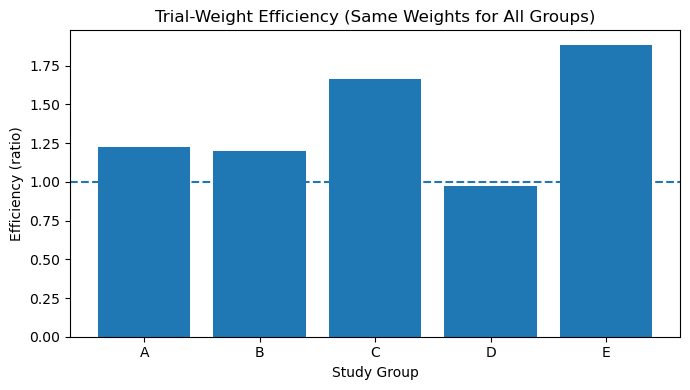

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Dataset (same as earlier) ---
data = {
    "Study Group": ["A","B","C","D","E"],
    "Study Hours": [10, 12, 8, 15, 9],
    "Coffee Cups": [15, 18, 10, 20, 12],
    "Avg Quiz Score": [78, 85, 80, 82, 90],
    "Projects Completed": [2, 3, 2, 3, 4]
}
df_all = pd.DataFrame(data).set_index("Study Group")

# --- Trial weights (same ones used for E) ---
# Outputs: y1 (quiz), y2 (projects) -> weights u1, u2
# Inputs:  x1 (hours), x2 (coffee)  -> weights v1, v2
u1, u2 = 0.01, 0.10
v1, v2 = 0.05, 0.02

# Compute numerator, denominator, efficiency for each group
num = u1*df_all["Avg Quiz Score"] + u2*df_all["Projects Completed"]
den = v1*df_all["Study Hours"] + v2*df_all["Coffee Cups"]
eff = num / den

results = pd.DataFrame({
    "Weighted Outputs (Numerator)": np.round(num, 3),
    "Weighted Inputs (Denominator)": np.round(den, 3),
    "Trial Efficiency (num/den)": np.round(eff, 3)
}, index=df_all.index)

display(results)

# Optional: quick bar chart of trial efficiencies
plt.figure(figsize=(7,4))
plt.bar(results.index, results["Trial Efficiency (num/den)"])
plt.axhline(1.0, linestyle="--")
plt.title("Trial-Weight Efficiency (Same Weights for All Groups)")
plt.ylabel("Efficiency (ratio)")
plt.xlabel("Study Group")
plt.tight_layout()
plt.show()


## Interpreting Trial-Weight Efficiencies

Using one fixed set of weights for everyone ($u_1=0.01$, $u_2=0.10$, $v_1=0.05$, $v_2=0.02$), we computed:

- **Numerator** (weighted outputs): 
  $u_1 \cdot \text{quiz} + u_2 \cdot \text{projects}$
- **Denominator** (weighted inputs): 
  $v_1 \cdot \text{hours} + v_2 \cdot \text{coffee}$
- **Efficiency**: numerator / denominator

You should see that **some groups have efficiency larger than $1$** (e.g., Group E) and others are **below $1$**.  
This is expected because these are **arbitrary trial weights** — they are not yet constrained by DEA’s fairness rule that **every DMU must have efficiency $\le 1$ under the same weights**.

### Why DEA’s Optimization Is Needed
- If we let each DMU choose its own weights, many could appear $> 1$ (unfair comparison).
- DEA **optimizes the weights for each DMU** but **forces all DMUs to have efficiency $\le 1$** under those weights.
- The result is a **fair, relative efficiency score**:
  - Efficient DMUs achieve score $=1$ (on the frontier).
  - Inefficient DMUs have score $<1$ and can be benchmarked to efficient peers.

Next, we’ll switch from trial weights to the **DEA linear program** to compute proper efficiency scores for **each DMU**.


# DEA as an Optimization Problem (CRS / CCR, Multiplier Form)

We now turn the efficiency ratio into a **linear program (LP)** that the computer can solve.
Assume there are $n$ *Decision-Making Units (DMUs)*. Each DMU $j$ uses $m$ inputs and produces $s$ outputs.

- Inputs: $x_{ij}$ = amount of input $i$ used by DMU $j$, for $i=1,\dots,m$
- Outputs: $y_{rj}$ = amount of output $r$ produced by DMU $j$, for $r=1,\dots,s$
- Input weights: $v_i \ge 0$
- Output weights: $u_r \ge 0$

We evaluate one focal unit, DMU $o$.

---

## Goal (intuition)

Let DMU $o$ **choose its own nonnegative weights** $\{u_r\}$ and $\{v_i\}$ to make its **efficiency ratio**
$$
\text{Eff}_o \;=\; 
\frac{\sum_{r=1}^s u_r\,y_{ro}}{\sum_{i=1}^m v_i\,x_{io}}
$$
as **large as possible**.  
But to keep the comparison **fair**, the same weights must make **every** DMU’s ratio **no greater than $1$**.

Two technical steps make this solvable with linear programming:

1) **Normalize the denominator** (set DMU $o$’s weighted inputs to $1$):
$$
\sum_{i=1}^m v_i\,x_{io} \;=\; 1.
$$

2) **Cap everyone’s efficiency at $1$ with the same weights**:
$$
\sum_{r=1}^s u_r\,y_{rj} \;-\; \sum_{i=1}^m v_i\,x_{ij} \;\le\; 0,
\qquad \text{for } j=1,\dots,n.
$$

---

## LP (Multiplier) Formulation under Constant Returns to Scale (CRS / CCR)

**Decision variables:** output weights $u_1,\dots,u_s \ge 0$ and input weights $v_1,\dots,v_m \ge 0$.

**Objective:**
$$
\max \;\; \sum_{r=1}^s u_r\,y_{ro}
$$

**Subject to:**
$$
\sum_{i=1}^m v_i\,x_{io} \;=\; 1
$$

$$
\sum_{r=1}^s u_r\,y_{rj} \;-\; \sum_{i=1}^m v_i\,x_{ij} \;\le\; 0, 
\qquad j=1,\dots,n
$$

$$
u_r \ge 0 \;\; (r=1,\dots,s), 
\qquad
v_i \ge 0 \;\; (i=1,\dots,m).
$$

The **optimal objective value** is DMU $o$’s **DEA efficiency score** under CRS.  
- If the score equals $1$, DMU $o$ lies on the **efficiency frontier** (efficient).
- If the score is $<1$, DMU $o$ is **inefficient** relative to peers.

---

## What changes in the Variable Returns to Scale (VRS) model (preview)

Under *Variable Returns to Scale (VRS / BCC)* we add a convexity constraint in the dual (envelopment) form, or equivalently a **free intercept** in the multiplier form. We will return to this later; for now we implement the CRS model to compute efficiencies for our study-group dataset.
# DEA as an Optimization Problem (CRS / CCR, Multiplier Form)

We now turn the efficiency ratio into a **linear program (LP)** that the computer can solve.
Assume there are $n$ *Decision-Making Units (DMUs)*. Each DMU $j$ uses $m$ inputs and produces $s$ outputs.

- Inputs: $x_{ij}$ = amount of input $i$ used by DMU $j$, for $i=1,\dots,m$
- Outputs: $y_{rj}$ = amount of output $r$ produced by DMU $j$, for $r=1,\dots,s$
- Input weights: $v_i \ge 0$
- Output weights: $u_r \ge 0$

We evaluate one focal unit, DMU $o$.

---

## Goal (intuition)

Let DMU $o$ **choose its own nonnegative weights** $\{u_r\}$ and $\{v_i\}$ to make its **efficiency ratio**
$$
\text{Eff}_o \;=\; 
\frac{\sum_{r=1}^s u_r\,y_{ro}}{\sum_{i=1}^m v_i\,x_{io}}
$$
as **large as possible**.  
But to keep the comparison **fair**, the same weights must make **every** DMU’s ratio **no greater than $1$**.

Two technical steps make this solvable with linear programming:

1) **Normalize the denominator** (set DMU $o$’s weighted inputs to $1$):
$$
\sum_{i=1}^m v_i\,x_{io} \;=\; 1.
$$

2) **Cap everyone’s efficiency at $1$ with the same weights**:
$$
\sum_{r=1}^s u_r\,y_{rj} \;-\; \sum_{i=1}^m v_i\,x_{ij} \;\le\; 0,
\qquad \text{for } j=1,\dots,n.
$$

---

## LP (Multiplier) Formulation under Constant Returns to Scale (CRS / CCR)

**Decision variables:** output weights $u_1,\dots,u_s \ge 0$ and input weights $v_1,\dots,v_m \ge 0$.

**Objective:**
$$
\max \;\; \sum_{r=1}^s u_r\,y_{ro}
$$

**Subject to:**
$$
\sum_{i=1}^m v_i\,x_{io} \;=\; 1
$$

$$
\sum_{r=1}^s u_r\,y_{rj} \;-\; \sum_{i=1}^m v_i\,x_{ij} \;\le\; 0, 
\qquad j=1,\dots,n
$$

$$
u_r \ge 0 \;\; (r=1,\dots,s), 
\qquad
v_i \ge 0 \;\; (i=1,\dots,m).
$$

The **optimal objective value** is DMU $o$’s **DEA efficiency score** under CRS.  
- If the score equals $1$, DMU $o$ lies on the **efficiency frontier** (efficient).
- If the score is $<1$, DMU $o$ is **inefficient** relative to peers.

---

## What changes in the Variable Returns to Scale (VRS) model (preview)

Under *Variable Returns to Scale (VRS / BCC)* we add a convexity constraint in the dual (envelopment) form, or equivalently a **free intercept** in the multiplier form. We will return to this later; for now we implement the CRS model to compute efficiencies for our study-group dataset.


In [13]:
import pandas as pd
import numpy as np
import pulp

# --- Dataset (rebuild here for self-containment) ---
data = {
    "Study Group": ["A","B","C","D","E"],
    "Study Hours": [10, 12, 8, 15, 9],          # inputs x1
    "Coffee Cups": [15, 18, 10, 20, 12],        # inputs x2
    "Avg Quiz Score": [78, 85, 80, 82, 90],     # outputs y1
    "Projects Completed": [2, 3, 2, 3, 4]       # outputs y2
}
df = pd.DataFrame(data).set_index("Study Group")

# Matrices
X = df[["Study Hours", "Coffee Cups"]].values      # shape (n, m)
Y = df[["Avg Quiz Score", "Projects Completed"]].values  # shape (n, s)
DMUs = df.index.tolist()
n, m, s = X.shape[0], X.shape[1], Y.shape[1]

def dea_crs_efficiencies(X, Y, DMUs, tol=1e-6):
    """
    Compute DEA efficiencies under CRS/CCR (multiplier form) for every DMU.
    Returns:
      - efficiencies: pd.Series (index=DMUs)
      - weights_u_df: pd.DataFrame of optimal output weights per DMU
      - weights_v_df: pd.DataFrame of optimal input weights per DMU
    """
    n, m, s = X.shape[0], X.shape[1], Y.shape[1]
    eff_vals = []
    all_u = []
    all_v = []

    for o in range(n):
        prob = pulp.LpProblem(f"DEA_CRS_DMU_{DMUs[o]}", pulp.LpMaximize)

        # Variables: u_r >= 0 (outputs), v_i >= 0 (inputs)
        u = {r: pulp.LpVariable(f"u_{r}", lowBound=0) for r in range(s)}
        v = {i: pulp.LpVariable(f"v_{i}", lowBound=0) for i in range(m)}

        # Objective: maximize weighted outputs of DMU o
        prob += pulp.lpSum(u[r] * Y[o, r] for r in range(s))

        # Normalization: weighted inputs of DMU o = 1
        prob += pulp.lpSum(v[i] * X[o, i] for i in range(m)) == 1

        # Fairness constraints: for each DMU j
        for j in range(n):
            prob += (
                pulp.lpSum(u[r] * Y[j, r] for r in range(s))
                - pulp.lpSum(v[i] * X[j, i] for i in range(m))
                <= 0
            )

        # Solve with CBC
        prob.solve(pulp.PULP_CBC_CMD(msg=False))

        # Extract objective value (efficiency)
        eff = pulp.value(prob.objective)
        if eff is None:
            eff = np.nan

        eff_vals.append(eff)

        # Extract weights robustly using pulp.value(...)
        all_u.append({f"u{r+1}": (pulp.value(u[r]) if pulp.value(u[r]) is not None else 0.0) for r in range(s)})
        all_v.append({f"v{i+1}": (pulp.value(v[i]) if pulp.value(v[i]) is not None else 0.0) for i in range(m)})

    eff_series = pd.Series(eff_vals, index=DMUs, name="DEA Efficiency (CRS)")

    # clip tiny numerical noise above 1
    def clip1(e):
        if pd.notnull(e) and e > 1 - tol:
            return min(1.0, e)
        return e

    eff_series = eff_series.apply(clip1)

    weights_u_df = pd.DataFrame(all_u, index=DMUs)
    weights_v_df = pd.DataFrame(all_v, index=DMUs)
    return eff_series, weights_u_df, weights_v_df

# Run DEA
eff, U, V = dea_crs_efficiencies(X, Y, DMUs)

# Combine into a single table, round for readability, and print cleanly
results = pd.concat([eff, U, V], axis=1)
results_sorted = results.sort_values("DEA Efficiency (CRS)", ascending=False).round(3)

print("DEA Efficiencies (CRS/CCR) and Optimal Weights")
print(results_sorted.to_string())


DEA Efficiencies (CRS/CCR) and Optimal Weights
   DEA Efficiency (CRS)     u1    u2     v1     v2
C                 1.000  0.012  0.00  0.000  0.100
E                 1.000  0.000  0.25  0.000  0.083
A                 0.780  0.010  0.00  0.100  0.000
B                 0.708  0.008  0.00  0.083  0.000
D                 0.547  0.007  0.00  0.067  0.000


# Interpreting CRS DEA Results

We computed DEA efficiencies for all study groups under the **Constant Returns to Scale (CRS / CCR)** model.  

| Study Group | DEA Efficiency | Status | Notes |
|-------------|----------------|--------|-------|
| **C**       | 1.000          | Efficient | Lies on the frontier with strong balance of inputs vs outputs. |
| **E**       | 1.000          | Efficient | Benchmark: high quiz score and projects with moderate inputs. |
| **A**       | 0.780          | Inefficient | Could proportionally reduce inputs or increase outputs by ~22% to reach the frontier. |
| **B**       | 0.708          | Inefficient | Needs ~29% proportional improvement to match peers. |
| **D**       | 0.547          | Inefficient | Least efficient; needs ~45% improvement to reach the frontier. |

---

## Understanding the Weights

Each DMU is allowed to choose its own **weights** ($u_r$ for outputs, $v_i$ for inputs) to make itself look as efficient as possible:

- **Output weights ($u_1$, $u_2$):**  
  $u_1$ corresponds to *Avg Quiz Score*.  
  $u_2$ corresponds to *Projects Completed*.  

- **Input weights ($v_1$, $v_2$):**  
  $v_1$ corresponds to *Study Hours*.  
  $v_2$ corresponds to *Coffee Cups*.  

### What the results show:
- Efficient groups (C and E) found **weight combinations** that let them achieve an efficiency of 1, while keeping all others ≤ 1.  
- Inefficient groups (A, B, D) could not reach 1 under those constraints.  
  - Example: Group A achieved only 0.78, meaning it would need to **reduce inputs or increase outputs by ~22%** to be efficient.  
  - Group D is especially inefficient, at 0.547, meaning it is furthest from the frontier.

---

## Key Takeaways for Students

1. **Efficiency = 1** does not mean "perfect" — it means "best relative to peers."  
2. **Efficiency < 1** indicates slack: the group could do better by either:  
   - consuming fewer inputs for the same outputs, or  
   - producing more outputs with the same inputs.  
3. DEA is **relative**: results depend entirely on the comparison group.  

In practice, DEA not only flags inefficient units but also identifies *which efficient peers* they should be compared to — this comes from the **envelopment (dual) form**, which we can explore next.


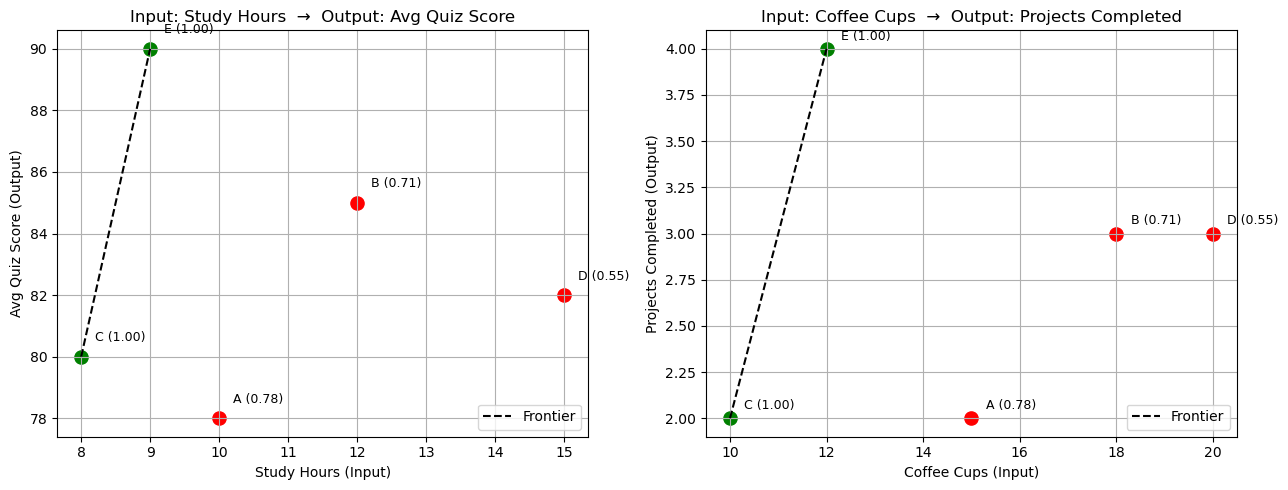

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Expect df (dataframe) and eff (Series of efficiencies) to be in memory
labels = df.index.tolist()
eff_scores = eff.round(3)

# Helper to color efficient/inefficient
def dmu_color(lbl):
    return "green" if eff_scores[lbl] == 1 else "red"

fig, axes = plt.subplots(1, 2, figsize=(13,5))

# ---------- Left: Study Hours (Input) vs Avg Quiz Score (Output) ----------
ax = axes[0]
x1 = df["Study Hours"].values
y1 = df["Avg Quiz Score"].values

for i, lbl in enumerate(labels):
    ax.scatter(x1[i], y1[i], s=90, color=dmu_color(lbl))
    ax.text(x1[i] + 0.2, y1[i] + 0.5, f"{lbl} ({eff_scores[lbl]:.2f})", fontsize=9)

# Frontier through efficient DMUs (C and E) in this projection
hours_score_frontier = df.loc[["C","E"], ["Study Hours","Avg Quiz Score"]].values
hours_score_frontier = hours_score_frontier[hours_score_frontier[:,0].argsort()]
ax.plot(hours_score_frontier[:,0], hours_score_frontier[:,1], "k--", label="Frontier")

ax.set_title("Input: Study Hours  →  Output: Avg Quiz Score")
ax.set_xlabel("Study Hours (Input)")
ax.set_ylabel("Avg Quiz Score (Output)")
ax.legend(loc="lower right")
ax.grid(True)

# ---------- Right: Coffee Cups (Input) vs Projects Completed (Output) ----------
ax = axes[1]
x2 = df["Coffee Cups"].values
y2 = df["Projects Completed"].values

for i, lbl in enumerate(labels):
    ax.scatter(x2[i], y2[i], s=90, color=dmu_color(lbl))
    ax.text(x2[i] + 0.3, y2[i] + 0.05, f"{lbl} ({eff_scores[lbl]:.2f})", fontsize=9)

# Frontier through efficient DMUs (C and E) in this projection
coffee_proj_frontier = df.loc[["C","E"], ["Coffee Cups","Projects Completed"]].values
coffee_proj_frontier = coffee_proj_frontier[coffee_proj_frontier[:,0].argsort()]
ax.plot(coffee_proj_frontier[:,0], coffee_proj_frontier[:,1], "k--", label="Frontier")

ax.set_title("Input: Coffee Cups  →  Output: Projects Completed")
ax.set_xlabel("Coffee Cups (Input)")
ax.set_ylabel("Projects Completed (Output)")
ax.legend(loc="lower right")
ax.grid(True)

plt.tight_layout()
plt.show()


## Comparing Two DEA Projections Side by Side

The two panels show the same study groups (DMUs) but with different input–output pairs:

- **Left Panel (Study Hours → Avg Quiz Score):**  
  - Efficient groups **C** and **E** lie on the dashed **frontier line**.  
  - Inefficient groups (**A, B, D**) are **below the frontier**, meaning they achieve lower quiz scores for the study hours invested.  

- **Right Panel (Coffee Cups → Projects Completed):**  
  - Again, **C** and **E** define the frontier, producing the best ratio of projects to coffee consumed.  
  - Inefficient groups (**A, B, D**) are **to the right of the frontier**, using more coffee for the same number of projects.  

### Key Insights
- **Consistency across views:** Groups **C** and **E** are efficient in both projections and in the full DEA model (scores = 1).  
- **Relative inefficiency:** Groups **A, B, D** fall short in both cases, either requiring more inputs or producing fewer outputs compared to efficient peers.  
- **Geometry matches DEA math:** The dashed frontier corresponds to the **best observed trade-offs**. DEA efficiency scores (<1) quantify how far each inefficient DMU is from that frontier.  


# DEA Envelopment (Dual) Form

So far, we used the **Multiplier Form** of DEA:
- Each DMU chose weights on inputs ($v_i$) and outputs ($u_r$).
- Objective: maximize its own weighted output/input ratio.
- Constraint: no DMU efficiency exceeds 1.

There is an **equivalent formulation**, called the **Envelopment Form** (or Dual Form).  
Instead of choosing weights, we “envelop” inefficient DMUs with a convex combination of efficient ones.

---

## CRS / CCR Envelopment Model

For DMU $o$, the envelopment form is:

**Objective:**

$$
\min \;\; \theta
$$

**Subject to:**

1. Input constraints:
$$
\sum_{j=1}^n \lambda_j \, x_{ij} \le \theta \, x_{io}, 
\quad \forall i = 1,\dots,m
$$

2. Output constraints:
$$
\sum_{j=1}^n \lambda_j \, y_{rj} \ge y_{ro}, 
\quad \forall r = 1,\dots,s
$$

3. Non-negativity:
$$
\lambda_j \ge 0, \quad \forall j
$$

---

## Interpretation

- $\theta$ is a scalar (efficiency score) representing how much DMU $o$ could **proportionally reduce inputs** while still producing at least the same outputs.
- If $\theta = 1$: DMU $o$ is **efficient** (on the frontier).  
- If $\theta < 1$: DMU $o$ is **inefficient**, and the value shows the **proportional input reduction** possible.

The variables $\lambda_j$ represent **peer weights**:
- They indicate which DMUs on the frontier serve as **benchmarks** for DMU $o$.  
- For example, if $\lambda_C = 0.6$ and $\lambda_E = 0.4$, then DMU $o$ could operate like a **60%/40% mix of C and E**.

---

## Why this form is useful

- Provides **reference sets (peers)**: inefficient DMUs are compared to specific efficient DMUs.  
- Gives **slacks**: extra input reductions or output increases beyond proportional scaling.  
- Easier to compute in practice (common in DEA software).


In [10]:
import pandas as pd
import numpy as np
import pulp

# ---------- Dataset (rebuild for self-containment) ----------
data = {
    "Study Group": ["A","B","C","D","E"],
    "Study Hours": [10, 12, 8, 15, 9],          # inputs x1
    "Coffee Cups": [15, 18, 10, 20, 12],        # inputs x2
    "Avg Quiz Score": [78, 85, 80, 82, 90],     # outputs y1
    "Projects Completed": [2, 3, 2, 3, 4]       # outputs y2
}
df = pd.DataFrame(data).set_index("Study Group")

X = df[["Study Hours", "Coffee Cups"]].values        # inputs: shape (n, m)
Y = df[["Avg Quiz Score", "Projects Completed"]].values  # outputs: shape (n, s)
DMUs = df.index.tolist()
n, m, s = X.shape[0], X.shape[1], Y.shape[1]

def dea_crs_envelopment(X, Y, DMUs, tol=1e-6):
    """
    CRS/CCR envelopment (input-oriented):
      min theta
      s.t.   sum_j lambda_j * x_ij <= theta * x_io   for all inputs i
             sum_j lambda_j * y_rj >=        y_ro    for all outputs r
             lambda_j >= 0
    Returns:
      - theta: pd.Series of efficiencies
      - lambdas: pd.DataFrame of peer weights (rows = DMU_o, cols = DMU_j)
    """
    n, m, s = X.shape[0], X.shape[1], Y.shape[1]
    thetas = []
    lambdas_list = []

    for o in range(n):
        # LP: minimize theta
        prob = pulp.LpProblem(f"DEA_CRS_Envelopment_{DMUs[o]}", pulp.LpMinimize)

        # Variables: theta (scalar), lambda_j >= 0
        theta = pulp.LpVariable("theta", lowBound=0)
        lam = {j: pulp.LpVariable(f"lam_{j}", lowBound=0) for j in range(n)}

        # Objective
        prob += theta

        # Input constraints: sum_j lam_j * x_ij <= theta * x_io   for each input i
        for i in range(m):
            prob += pulp.lpSum(lam[j] * X[j, i] for j in range(n)) <= theta * X[o, i]

        # Output constraints: sum_j lam_j * y_rj >= y_ro          for each output r
        for r in range(s):
            prob += pulp.lpSum(lam[j] * Y[j, r] for j in range(n)) >= Y[o, r]

        # Solve
        prob.solve(pulp.PULP_CBC_CMD(msg=False))

        # Collect results
        theta_val = pulp.value(theta)
        if theta_val is None:
            theta_val = np.nan
        thetas.append(theta_val)

        lam_vals = [pulp.value(lam[j]) if pulp.value(lam[j]) is not None else 0.0 for j in range(n)]
        lambdas_list.append(lam_vals)

    theta_series = pd.Series(thetas, index=DMUs, name="Theta (CRS, input-oriented)")

    # Numerical tidy: clip tiny >1 to 1.0, and very tiny negatives to 0
    theta_series = theta_series.apply(lambda v: 0.0 if (pd.notnull(v) and v < 0 and abs(v) < tol) else v)
    theta_series = theta_series.apply(lambda v: min(1.0, v) if (pd.notnull(v) and v > 1 - tol) else v)

    lambdas_df = pd.DataFrame(lambdas_list, index=DMUs, columns=DMUs)
    return theta_series, lambdas_df

theta, lambdas = dea_crs_envelopment(X, Y, DMUs)

print("CRS Envelopment (Input-oriented) — Efficiency and Peer Weights\n")
print("Theta (efficiency):")
print(theta.round(3).to_string())

print("\nPeer weights λ (rows: evaluated DMU o, columns: reference DMU j)\n"
      "Only non-zero entries indicate reference peers for that DMU.\n")
# Show a compact view: only columns with any non-zero across rows
nonzero_cols = (lambdas.abs() > 1e-9).any(axis=0)
print(lambdas.loc[:, nonzero_cols].round(3).to_string())


CRS Envelopment (Input-oriented) — Efficiency and Peer Weights

Theta (efficiency):
A    0.780
B    0.708
C    1.000
D    0.547
E    1.000

Peer weights λ (rows: evaluated DMU o, columns: reference DMU j)
Only non-zero entries indicate reference peers for that DMU.

       C      E
A  0.943  0.029
B  0.500  0.500
C  1.000  0.000
D  0.414  0.543
E  0.000  1.000


# Interpreting CRS Envelopment (Input-Oriented) Results

We applied the **DEA Envelopment Form (CRS/CCR, input-oriented)** to the study group dataset.

---

## Efficiency Scores (θ)

| Study Group | θ (Efficiency) | Status |
|-------------|----------------|--------|
| A           | 0.780          | Inefficient |
| B           | 0.708          | Inefficient |
| C           | 1.000          | Efficient (on frontier) |
| D           | 0.547          | Inefficient |
| E           | 1.000          | Efficient (on frontier) |

### Meaning of θ
- **θ = 1.000** → The DMU is **efficient** (already on the frontier).  
- **θ < 1.000** → The DMU is **inefficient** and could reduce all inputs by **(1 – θ)** proportionally while maintaining current outputs.  
  - Group A (θ = 0.780): could reduce inputs by about **22%**.  
  - Group B (θ = 0.708): could reduce inputs by about **29%**.  
  - Group D (θ = 0.547): least efficient, could reduce inputs by about **45%**.  

---

## Peer Weights (λ)

| Evaluated DMU | λ(C) | λ(E) | Interpretation |
|---------------|------|------|----------------|
| A             | 0.943 | 0.029 | Group A’s benchmark is **almost entirely Group C** (94%) with a tiny role for E. |
| B             | 0.500 | 0.500 | Group B should look to a **50/50 mix of C and E** as peers. |
| C             | 1.000 | 0.000 | Group C is efficient → it is its own reference. |
| D             | 0.414 | 0.543 | Group D’s benchmark is a **blend of C (41%) and E (54%)**. |
| E             | 0.000 | 1.000 | Group E is efficient → it is its own reference. |

---

## Key Insights

- Efficient DMUs (C and E) serve as **benchmarks**.  
- Inefficient DMUs (A, B, D) are compared to convex combinations of C and E.  
- Example: Group B is inefficient but could emulate a **blend of C and E** to achieve efficiency.  
- This shows the strength of the **envelopment form**: it not only gives efficiency scores but also identifies **reference sets (peers)** for each inefficient DMU.

---


## In-Class Activity: DEA by Hand (CRS Envelopment Form)

We want to evaluate **DMU A** using a simple dataset.  
Each DMU has **one input** (Study Hours) and **one output** (Projects Completed).  

| DMU | Input: Study Hours | Output: Projects |
|-----|--------------------|------------------|
| A   | 10                 | 2                |
| B   | 8                  | 2                |
| C   | 6                  | 2                |

---

### Task

1. Write the CRS **envelopment form** for DMU A:

- **Objective:**  
  Minimize $\theta$  

- **Subject to:**  
  $\lambda_B \cdot x_B + \lambda_C \cdot x_C \;\leq\; \theta \cdot x_A$  
  $\lambda_B \cdot y_B + \lambda_C \cdot y_C \;\geq\; y_A$  
  $\lambda_B, \lambda_C \geq 0$

2. Plug in the numbers for A, B, and C.  
3. Solve for $\theta$.  
4. Interpret the efficiency score of DMU A.  

✍️ *Work it out on paper first — no computers. Think: how much could DMU A reduce its inputs (study hours) while still producing 2 projects, compared to the efficient peers (B and C)?*


## Solution: DEA by Hand for DMU A

**Step 1. Objective:**  
Minimize $\theta$  

**Step 2. Constraints (plugging in data):**

- Input constraint:  
  $8\lambda_B + 6\lambda_C \;\leq\; \theta \cdot 10$

- Output constraint:  
  $2\lambda_B + 2\lambda_C \;\geq\; 2$

- Non-negativity:  
  $\lambda_B, \lambda_C \geq 0$

---

**Step 3. Simplify the output constraint:**  
$2(\lambda_B + \lambda_C) \geq 2 \;\;\;\Longrightarrow\;\;\; \lambda_B + \lambda_C \geq 1$

**Step 4. To minimize $\theta$, choose the smallest input mix:**  
The best choice is to set $\lambda_C = 1, \lambda_B = 0$.  
Then:  
$8(0) + 6(1) \leq \theta \cdot 10$  
$6 \leq 10\theta$

So:  
$\theta \geq 0.6$

**Step 5. Optimal solution:**  
$\theta^* = 0.6$

---

### Interpretation

- DMU A has efficiency $\theta = 0.6$ under CRS.  
- This means A could reduce its inputs (study hours) by **40%** and still achieve 2 projects, if it operated like its efficient peer (C).  
- Therefore, DMU A is **inefficient** compared to peers B and C.


In [11]:
import pandas as pd
from IPython.display import display

# Create dataframe from the provided data
df_table = pd.DataFrame(data)
df_table.set_index("Study Group", inplace=True)

# Display as a table
display(df_table)

,Study Hours,Coffee Cups,Avg Quiz Score,Projects Completed
Study Group,,,,
A,10,15,78,2
B,12,18,85,3
C,8,10,80,2
D,15,20,82,3
E,9,12,90,4
